# Excercise 7.2 Visualization of image data

## 7.2.1 Load the MNIST Data-Set and analyze the data
* get the data using code below
* assemble information on number of images, size of images, distribution among different classes

In [1]:
from sklearn.datasets import fetch_openml
from math import sqrt
import pandas as pd

useParquet = True

In [2]:
if useParquet == True:
    # X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
    %time df_mnist = pd.read_parquet("../Module_IX_ClassificationRegression/MNIST.parquet")
    X=df_mnist.iloc[:, 0:-1]
    y=df_mnist.iloc[:, -1]
else:
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

CPU times: total: 2.52 s
Wall time: 1.17 s


In [15]:
df_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [3]:
numPatterns = X.shape[0]
imageSize = X.shape[1]
imageRows = int(sqrt(imageSize))
print(f"numPatters = {numPatterns}\t imageSize = {imageSize} \t [rows, cols] = [{imageRows}, {imageRows}] ")

numPatters = 70000	 imageSize = 784 	 [rows, cols] = [28, 28] 


In [4]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

## 7.2.2 Visualize the input data
* Display at least two images for each class in the dataset

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def showInputData(X):
    fig, ax = plt.subplots(24, 15, subplot_kw=dict(xticks=[], yticks=[]), figsize=(24,15))
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=1.6, 
                        hspace=0.4)
    for i, axi in enumerate(ax.flat):
        axi.imshow(X[i].reshape(28, 28), cmap="gray_r")
        axi.set_title(y[i], fontsize=12)

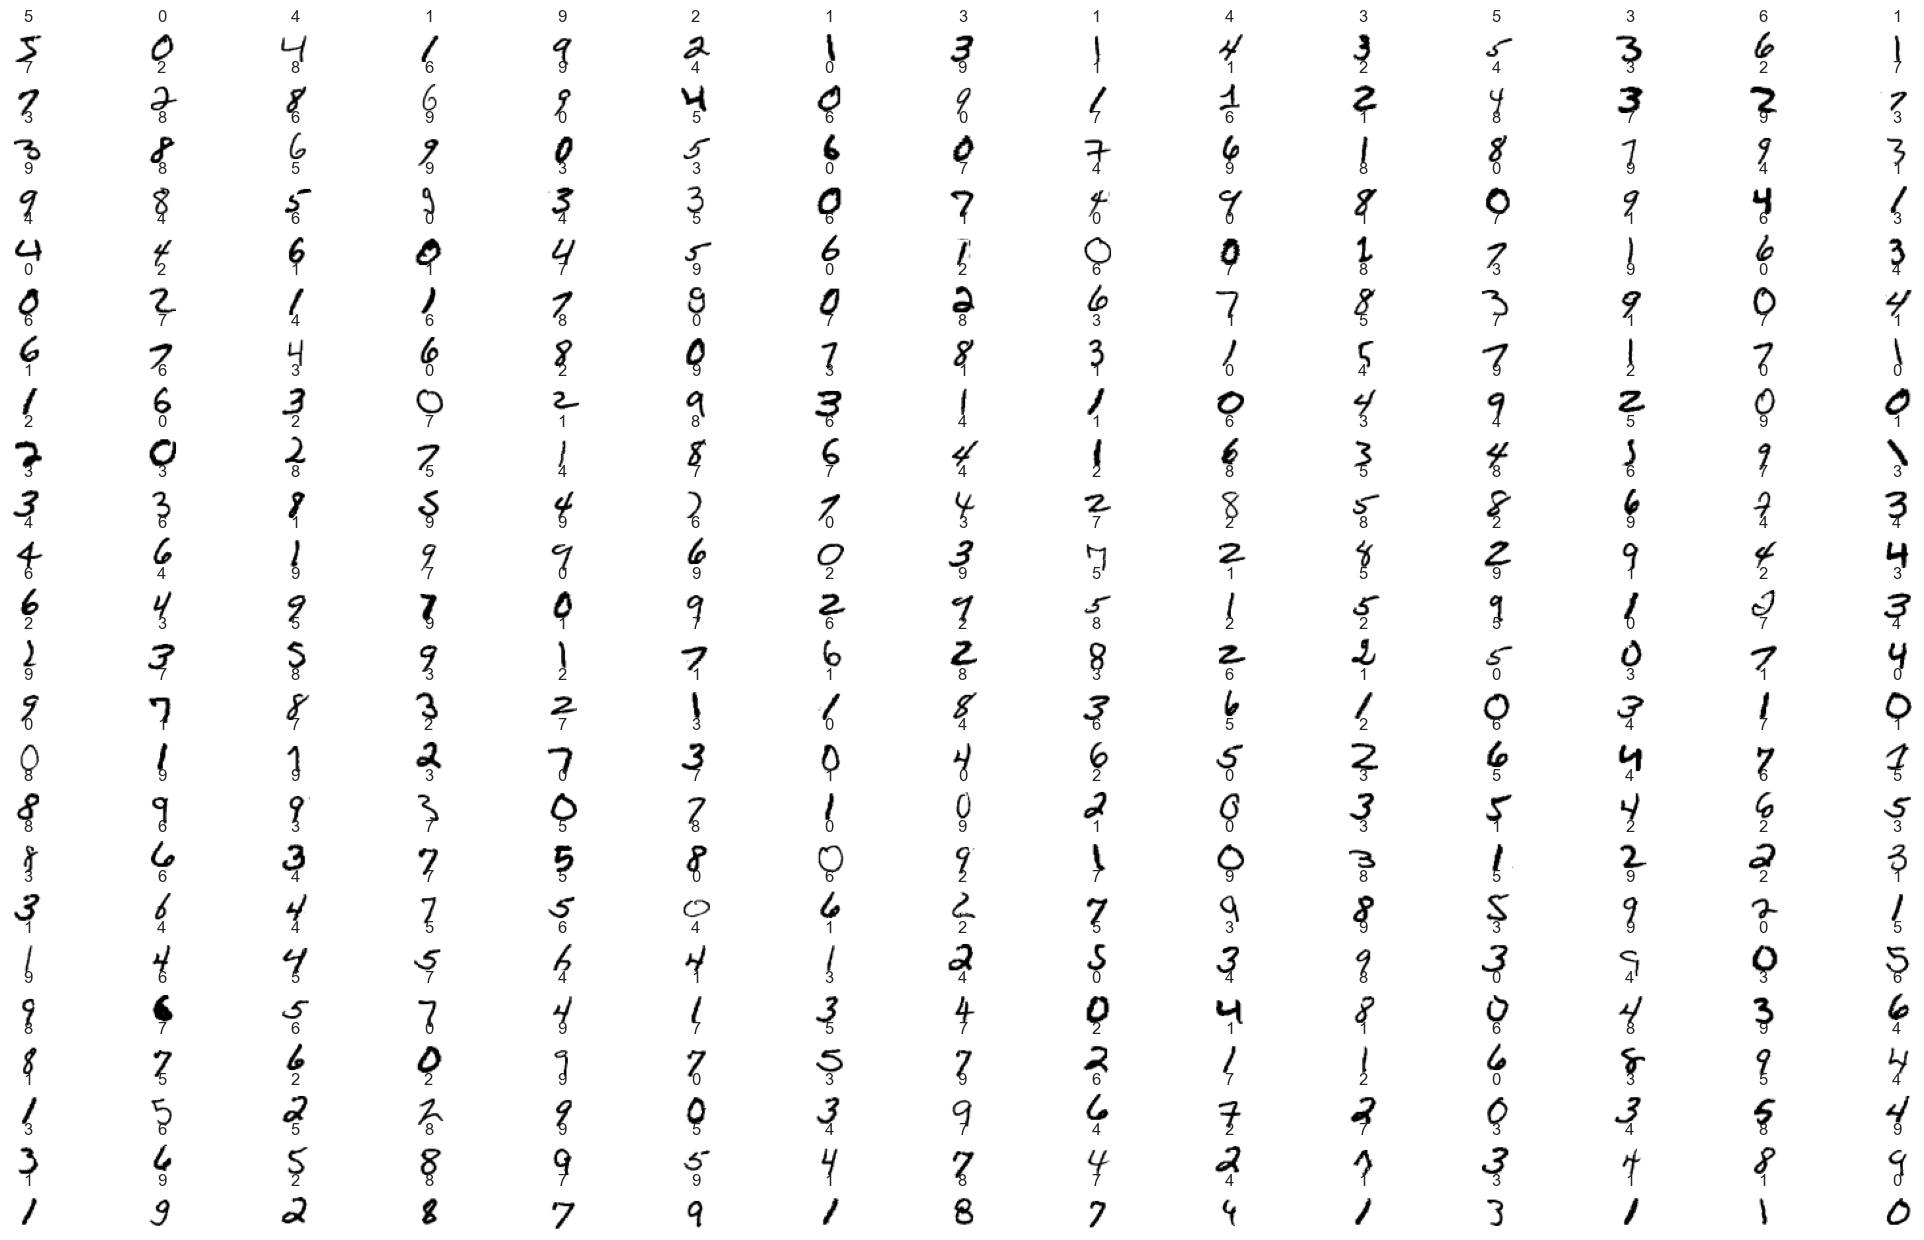

In [6]:
showInputData(X.iloc[0:360, :].to_numpy())

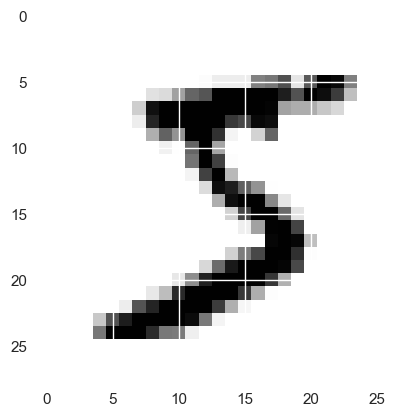

In [7]:
plt.imshow(X.iloc[0:1, :].to_numpy().reshape(28, 28), cmap="gray_r")

## 7.2.3 Create an animation with plotly for some samples of a single digit

The following steps have to be performed to shape the date for visualization as a sequence of grayscale images:
1. Get the required subset of data
2. Transform the pixel columns into a numpy array
3. reshape the array to have three dimensions
   * d0 -> sequence number of the image
   * d1 -> rows
   * d2 -> columns

#### (1) To simplify the selection of digits, we add the class values to the X dataframe and do the selection afterwards

In [8]:
res = X.join(y)
res

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [9]:
res_0 = res[res["class"] == 7]

In [10]:
res_0

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
69963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
69968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
69979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


#### (2) Now we can drop the class again and transform the resulting dataframe into a three dimensional numpy array as linear sequence (first dimension) of two dimensional images (the other two dimensions)

In [11]:
res_pure = res_0.drop("class", axis=1)

In [12]:
res_reshaped = res_pure.to_numpy().reshape((res_pure.shape[0], imageRows, imageRows))

In [13]:
res_reshaped.shape

(7293, 28, 28)

#### (3) Using ploty's imshow functionality we get the animation part for free 
we modify the frame and transitionparameters duration for our purposes

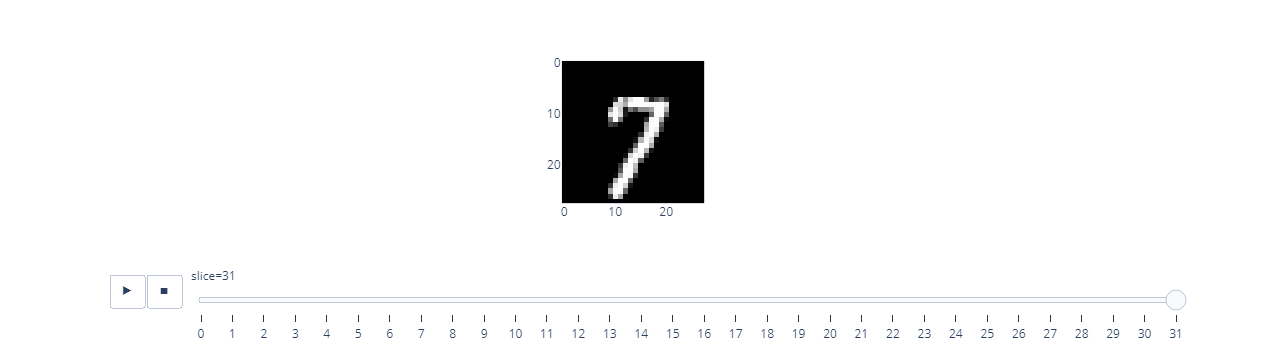

In [16]:
import plotly.express as px

fig = px.imshow(res_reshaped[0:32, :], binary_string=True, animation_frame=0, labels=dict(animation_frame="slice"))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1
fig.show()

## 7.2.3 Draw Conclusions

Numbers are drawn very differently. If we want to classify the digits, we might need to add some further preprocessing, e.g. to achive shift and scale invariance